In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
import netCDF4
%matplotlib inline

In [3]:
areacella1 = xr.open_dataset('areacella_fx_CanESM5_historical_r10i1p1f1_gn.nc').areacella
areacella2 = xr.open_dataset('areacella_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').areacella
areacella3 = xr.open_dataset('areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').areacella
areacella4 = xr.open_dataset('areacella_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').areacella
areacella5 = xr.open_dataset('areacella_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').areacella
areacella6 = xr.open_dataset('areacella_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc').areacella
areacella7 = xr.open_dataset('areacella_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').areacella
areacella8 = xr.open_dataset('areacella_fx_MIROC-ES2L_historical_r10i1p1f2_gn.nc').areacella
areacella9 = xr.open_dataset('areacella_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').areacella
areacella10 = xr.open_dataset('areacella_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').areacella

In [4]:
landfrac1 = xr.open_dataset('sftlf_fx_CanESM5_ssp585_r1i1p1f1_gn.nc').sftlf
landfrac2 = xr.open_dataset('sftlf_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').sftlf
landfrac3 = xr.open_dataset('sftlf_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').sftlf
landfrac4 = xr.open_dataset('sftlf_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').sftlf
landfrac5 = xr.open_dataset('sftlf_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').sftlf
landfrac6 = xr.open_dataset('sftlf_fx_ACCESS-ESM1-5_historical_r10i1p1f1_gn.nc').sftlf
landfrac7 = xr.open_dataset('sftlf_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').sftlf
landfrac8 = xr.open_dataset('sftlf_fx_MIROC-ES2L_historical_r1i1p1f2_gn.nc').sftlf
landfrac9 = xr.open_dataset('sftlf_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').sftlf
landfrac10 = xr.open_dataset('sftlf_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').sftlf

In [5]:
area1 = areacella1 * landfrac1/100
area2 = areacella2 * landfrac2/100
area3 = areacella3 * landfrac3/100
area4 = areacella4 * landfrac4/100
area5 = areacella5 * landfrac5/100
area6 = areacella6 * landfrac6/100
area7 = areacella7 * landfrac7/100
area8 = areacella8 * landfrac8/100
area9 = areacella9 * landfrac9/100
area10 = areacella10 * landfrac10/100

In [6]:
ds1 = xr.open_dataset('rh_Lmon_CanESM5_hist_ssp585_r1i1p1f1_gn_185001-210012.nc')
ds2 = xr.open_dataset('rh_Lmon_CanESM5-CanOE_hist_ssp585_r1i1p2f1_gn_185001-210012.nc')
ds3 = xr.open_dataset('rh_Lmon_UKESM1-0-LL_hist_ssp585_r1i1p1f2_gn_185001-210012.nc')
ds4 = xr.open_dataset('rh_Lmon_CNRM-ESM2-1_hist_ssp585_r1i1p1f2_gr_185001-210012.nc')
ds5 = xr.open_dataset('rh_Lmon_IPSL-CM6A-LR_hist_ssp585_r1i1p1f1_gr_185001-210012.nc')
ds6 = xr.open_dataset('rh_Lmon_ACCESS-ESM1-5_hist_ssp585_r1i1p1f1_gn_185001-210012.nc')
ds7 = xr.open_dataset('rh_Lmon_MPI-ESM1-2-LR_hist_ssp585_r1i1p1f1_gn_185001-210012.nc')
ds8 = xr.open_dataset('rh_Lmon_MIROC-ES2L_hist_ssp585_r1i1p1f2_gn_185001-210012.nc')

In [7]:
dset_dict = {'CanESM5':ds1, 'CanESM5-CanOE':ds2, 'UKESM1-0-LL':ds3,  
             'CNRM-ESM2-1':ds4, 'IPSL-CM6A-LR':ds5, 'ACCESS-ESM1-5':ds6,
             'MPI-ESM1-2-LR':ds7, 'MIROC-ES2L':ds8}

In [8]:
time_slice=slice('1850', '2100')

In [9]:
#initialize dictionary of xarray datasets
rh_dict = {}

for name, ds in dset_dict.items():
        
    ds = xr.decode_cf(ds)
    ds = ds.sel(time=time_slice)
    
    # convert from per second to per year
    yearsec = 365*24*60*60
    ds.rh.data = ds.rh.data * yearsec
    
    #convert from kg to GtC
    ds.rh.data = ds.rh.data/(1e12)
    ds.rh.attrs['units'] = 'GtC m-2 y-1'
    
    #nbp_mon=nbp_mon.sel(lon=slice(lon1,lon2), lat=slice(lat1,lat2))
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)

    rh_dict[name] = ds

In [10]:
glob1 = rh_dict['CanESM5'].rh.weighted(area1).sum(('lon','lat'))
glob2 = rh_dict['CanESM5-CanOE'].rh.weighted(area2).sum(('lon','lat'))
glob3 = rh_dict['UKESM1-0-LL'].rh.weighted(area3).sum(('lon','lat'))
glob4 = rh_dict['CNRM-ESM2-1'].rh.weighted(area4).sum(('lon','lat'))
glob5 = rh_dict['IPSL-CM6A-LR'].rh.weighted(area5).sum(('lon','lat'))
glob6 = rh_dict['ACCESS-ESM1-5'].rh.weighted(area6).sum(('lon','lat'))
glob7 = rh_dict['MPI-ESM1-2-LR'].rh.weighted(area7).sum(('lon','lat'))
glob8 = rh_dict['MIROC-ES2L'].rh.weighted(area8).sum(('lon','lat'))

In [12]:
grh_dict = {'CanESM5':glob1, 'CanESM5-CanOE':glob2, 'UKESM1-0-LL':glob3,  
             'CNRM-ESM2-1':glob4, 'IPSL-CM6A-LR':glob5, 'ACCESS-ESM1-5':glob6,
             'MPI-ESM1-2-LR':glob7, 'MIROC-ES2L':glob8}

## Plotting Time Series: Changes in global mean nbp (1850-2100 wrt 1850-1900)

In [13]:
for name, grh in grh_dict.items():
    
    # drop redundant variables (like "type")
    for coord in grh.coords:
        if coord not in ['time']:
            grh = grh.drop(coord)
    
    # reference the GSAT relative to the 1850 to 1900 pre-industrial period
    grh_anomalies = grh - grh.sel(time=slice('1850','1900')).mean(dim='time')
    
    grh_ann_anomalies = grh_anomalies.groupby('time.year').mean('time')
        
    # renaming labels
    grh_ann_anomalies = grh_ann_anomalies.rename(
        r'Global-mean RH relative to 1850-1900 in GtC/yr'
    )
    
    grh_dict[name] = grh_ann_anomalies.compute()

In [14]:
grh_ann_anomalies.dims, grh_ann_anomalies.shape, grh_ann_anomalies.coords

(('year',),
 (251,),
 Coordinates:
   * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100)

In [16]:
grh1_roll = grh_dict['CanESM5'].rolling(year=10).mean()
grh2_roll = grh_dict['CanESM5-CanOE'].rolling(year=10).mean()
grh3_roll = grh_dict['UKESM1-0-LL'].rolling(year=10).mean()
grh4_roll = grh_dict['CNRM-ESM2-1'].rolling(year=10).mean()
grh5_roll = grh_dict['IPSL-CM6A-LR'].rolling(year=10).mean()
grh6_roll = grh_dict['ACCESS-ESM1-5'].rolling(year=10).mean()
grh7_roll = grh_dict['MPI-ESM1-2-LR'].rolling(year=10).mean()
grh8_roll = grh_dict['MIROC-ES2L'].rolling(year=10).mean()

modelmean = (grh1_roll + grh2_roll + grh3_roll + grh4_roll +grh5_roll+grh6_roll 
             + grh7_roll + grh8_roll)/8

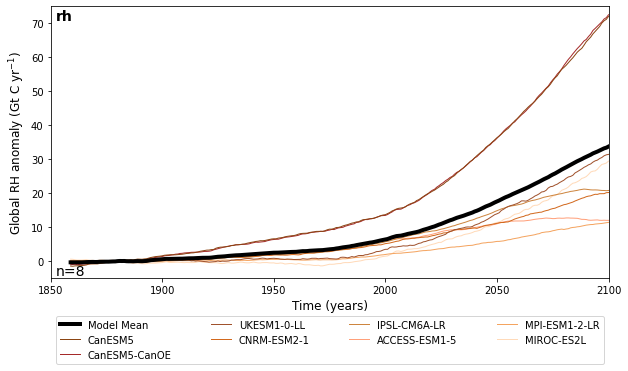

In [20]:
fig,ax = plt.subplots(figsize=(10,5))

grh8_roll.plot(linewidth=1, color= 'peachpuff', label='MIROC-ES2L')
grh7_roll.plot(linewidth=1, color= 'sandybrown',  label='MPI-ESM1-2-LR')
grh6_roll.plot(linewidth=1, color= 'lightsalmon', label='ACCESS-ESM1-5')
grh5_roll.plot(linewidth=1, color= 'peru',  label='IPSL-CM6A-LR')
grh4_roll.plot(linewidth=1, color= 'chocolate', label='CNRM-ESM2-1')
grh3_roll.plot(linewidth=1, color= 'sienna', label='UKESM1-0-LL')
grh2_roll.plot(linewidth=1, color= 'brown', label='CanESM5-CanOE')
grh1_roll.plot(linewidth=1, color= 'saddlebrown', label='CanESM5')

modelmean.plot(linewidth=4, color= 'black', label= 'Model Mean')

#add right colors
#N = 6
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,N)))

# set titel and name for axes
#plt.title('Historical & SSP5-8.5', fontsize = 15, fontweight = 'bold')
ax.text(0.01, 0.95, 'rh', 
        transform=ax.transAxes, ha="left", fontsize= 14, fontweight = 'bold')
ax.text(0.009, 0.01, 'n=8', 
        transform=ax.transAxes, ha="left", fontsize= 14)
plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel(r'Global RH anomaly (Gt C yr$^{\minus1}$)', fontsize = 12)
plt.xlim([1850,2100])
plt.ylim([-5,75])


# plotting legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(0, -0.12, 1, 0), loc="upper left", mode="expand", ncol=4)

plt.savefig("TimeSeriesMultiModelCarbonChanges585.png", bbox_inches="tight")
plt.show();

In [21]:
max_rh = max(modelmean)  # Find the maximum y value
max_year = modelmean[modelmean.argmax()]  # Find the x value corresponding to the maximum y value
print (max_year, max_rh)

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' ()>
array(33.75040871)
Coordinates:
    year     int64 2100 <xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' ()>
array(nan)
Coordinates:
    year     int64 1850


In [22]:
modelmean.sel(year=slice('2024','2034'))

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' (year: 11)>
array([10.76478918, 10.97657932, 11.22947211, 11.5109564 , 11.77082196,
       12.04238303, 12.23933063, 12.50814497, 12.77076666, 12.96262425,
       13.14306808])
Coordinates:
  * year     (year) int64 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034

In [23]:
modelmean.sel(year=slice('2024','2034')).mean()

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' ()>
array(11.9926306)

In [24]:
modelmean.sel(year=slice('2037','2047'))

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' (year: 11)>
array([13.86352363, 14.08944597, 14.31748284, 14.62700094, 14.85329857,
       15.13154992, 15.46768822, 15.77949992, 16.10528632, 16.37186592,
       16.61958021])
Coordinates:
  * year     (year) int64 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047

In [25]:
modelmean.sel(year=slice('2037','2047')).mean()

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' ()>
array(15.20238386)

In [26]:
modelmean.sel(year=slice('2090','2100'))

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' (year: 11)>
array([30.71633558, 31.03351924, 31.34261833, 31.72867808, 31.99601547,
       32.26515971, 32.5928053 , 32.92187971, 33.2128173 , 33.41504846,
       33.75040871])
Coordinates:
  * year     (year) int64 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100

In [27]:
modelmean.sel(year=slice('2090','2100')).mean()

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' ()>
array(32.27048054)

In [28]:
modelmean.sel(year=slice('2077','2087'))

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' (year: 11)>
array([26.17374957, 26.5638766 , 26.96653135, 27.28945976, 27.64679351,
       28.01183976, 28.36683953, 28.72057955, 29.08184994, 29.43100179,
       29.7305035 ])
Coordinates:
  * year     (year) int64 2077 2078 2079 2080 2081 2082 2083 2084 2085 2086 2087

In [29]:
modelmean.sel(year=slice('2077','2087')).mean()

<xarray.DataArray 'Global-mean RH relative to 1850-1900 in GtC/yr' ()>
array(27.99845681)